# Предсказание вторичной структуры заданной тРНК и анализ НК-белкового комплекса


## Задание 1. Предсказание вторичной структуры заданной тРНК

* Упр.1. Предсказание вторичной структуры тРНК путем поиска инвертированных повторов
Программа einverted из пакета EMBOSS позволяет найти инвертированные участки в нуклеотидных последовательностях. Найдите возможные комплементарные участки в последовательности исследуемой тРНК. Сравните с их описанием, полученным ранее с помощью find_pair. Результаты сравнения занесите в таблицу, приведенную ниже. Постарайтесь подобрать параметры для получения предсказания, наиболее близкого к реальной структуре.

* Упр.2. Предсказание вторичной структуры тРНК по алгоритму Зукера с помощью ViennaRNA.


#### Пример запуска einverted, значения переменных среды остануться

In [1]:
%set_env PATH=/home/preps/golovin/miniconda3/bin:/home/preps/golovin/miniconda3/condabin:/usr/local/bin:/usr/bin:/home/preps/golovin/progs/x3dna-v2.4/bin


env: PATH=/home/preps/golovin/miniconda3/bin:/home/preps/golovin/miniconda3/condabin:/usr/local/bin:/usr/bin:/home/preps/golovin/progs/x3dna-v2.4/bin


In [2]:
! echo "GCUUUGC" > rna.seq 
! einverted -sequence rna.seq -gap 12 -threshold 10 -match 3 -mismatch -3  -outfile outfile -outseq seqout

Find inverted repeats in nucleotide sequences



Если программа не работает используйте web вариант http://rna.tbi.univie.ac.at/cgi-bin/RNAfold.cgi

Реальная и предсказанная вторичная структура тРНК из файла XXXX.pdb 
 =============


| Участок структуры (расшифровку названий см. http://kodomo.fbb.msu.ru/FBB/year_07/term3/tRNA.pdf на рис. 2 в статье О.О.Фаворовой)  | Позиции в структуре (по результатам find_pair ) | Результаты предсказания  с помощью einverted | Результаты предсказания по алгоритму Зукера |
| -------|:------:| :------:|:------:|
| Акцепторный стебель  |  |  |  |
| D-стебель |  |  |  |
| T-стебель |  |  |  |
| Антикодоновый стебель  |  |  | |
|  Общее число канонических пар нуклеотидов |  |  | |



### ViennaRNA

 Добавим новое окружение в терминале 

<code>
conda activate /home/preps/golovin/miniconda3/envs/na2
conda list
python3 -m ipykernel install --user --name na2 --display-name "Python NA"
   </code>

перезагрузите страницу и выберете ядро сверху справа, NA

In [3]:
import RNA 

In [10]:
seq = "GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC"

# create fold_compound data structure (required for all subsequently applied  algorithms)
fc = RNA.fold_compound(seq)
 
# compute MFE and MFE structure
(mfe_struct, mfe) = fc.mfe()
 
# rescale Boltzmann factors for partition function computation
fc.exp_params_rescale(mfe)
 
# compute partition function
(pp, pf) = fc.pf()

# compute MEA structure
(MEA_struct, MEA) = fc.MEA()
 
# compute free energy of MEA structure
MEA_en = fc.eval_structure(MEA_struct)
 
# print everything like RNAfold -p --MEA
print("%s\n%s (%6.2f)" % (seq, mfe_struct, mfe))
print("%s [%6.2f]" % (pp, pf))
print("%s {%6.2f MEA=%.2f}" % (MEA_struct, MEA_en, MEA))
print(" frequency of mfe structure in ensemble %g; ensemble diversity %-6.2f" % (fc.pr_structure(mfe_struct), fc.mean_bp_distance()))

GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC
(((((((.......(((((((.((((.(((((((.((....)).)))..)))))))).)).)))))))))))).. (-31.50)
(((((((.......((((({{.((((.(((((((.((....)).)))..)))))))).}}.)))))))))))).. [-32.08]
(((((((.......(((((((.((((.(((((((.((....)).)))..)))))))).)).)))))))))))).. {-31.50 MEA=69.76}
 frequency of mfe structure in ensemble 0.391844; ensemble diversity 5.58  


In [25]:
subopt_data = { 'counter' : 1, 'sequence' : seq }
def print_subopt_result(structure, energy, data):
    if not structure == None:
        print(">subopt %d" % data['counter'])
        print("%s" % data['sequence'])
        print("%s [%6.2f]" % (structure, energy))
        # increase structure counter
        data['counter'] = data['counter'] + 1
fc.subopt_cb(300,print_subopt_result,subopt_data)

>subopt 1
GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC
((((((((((((.....)))))((.(.(((((.......))))).).))(((((.......)))))))))))).. [-29.20]
>subopt 2
GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC
(((((((..((((.........)))).(((((.......))))).....(((((.......)))))))))))).. [-28.50]
>subopt 3
GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC
(((((((........((((...((((.(((((((.((....)).)))..))))))))....)))).))))))).. [-28.90]
>subopt 4
GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC
(((((((........((((((.((((.(((((((.((....)).)))..)))))))).)).)))).))))))).. [-29.10]
>subopt 5
GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC
(((((((.......(((((...((((.(((.(((.((....)).)))...)))))))....)))))))))))).. [-28.50]
>subopt 6
GGGCUUGUAGCUCAGGUGGUUAGAGCGCACCCCUGAUAAGGGUGAGGUCGGUGGUUCAAGUCCACUCAGGCCCAC
(((((((.......(((((...((((.((((.((.((....)).))...))))))))..

In [11]:
RNA.svg_rna_plot(seq, MEA_struct, ssfile='ggg.svg' )

1

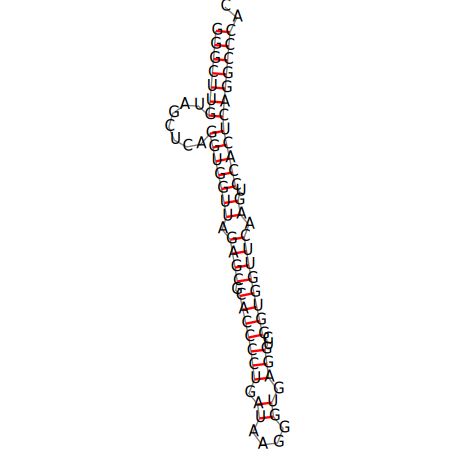

In [12]:
from IPython.display import SVG
SVG('ggg.svg')

## Задание 2 Поиск ДНК-белковых контактов в заданной структуре

#### Упр.1.
Вспомнить, как с помощью команды define JMol задавать множества атомов.

* Определите множество атомов кислорода 2'-дезоксирибозы (set1).
* Определите множество атомов кислорода в остатке фосфорной кислоты (set2).
* Определите множество атомов азота в азотистых основаниях (set3).
* Создайте скрипт-файл с определениями этих множеств.
* Создайте скрипт-файл, вызов которого в JMol даст последовательное (с паузами!) изображение всей структуры, только ДНК в проволочной модели, той же модели, но с выделенными шариками множеством атомов set1, затем set2 и set3.

#### Упр.2.
* Описать ДНК-белковые контакты в заданной структуре. Сравнить количество контактов разной природы.

Будем считать полярными атомы кислорода и азота, а неполярными  атомы углерода, фосфора и серы.

Назовем полярным контактом ситуацию, в которой расстояние между полярным атомом белка и полярным атомом ДНК меньше 3.5Å. Аналогично, неполярным контактом будем считать пару неполярных атомов на расстоянии меньше 4.5Å.

См. также подсказки..

Будем считать полярными атомы кислорода и азота, а неполярными  атомы углерода, фосфора и серы.
* Определите число контактов и заполните следующую таблицу.

##### Таблица. Контакты разного типа в комплексе XXXX.pdb

| '''Контакты атомов белка с''' | '''Полярные''' | '''Неполярные''' | '''Всего''' |
| -------|:------:| :------:|:------:|
| остатками 2'-дезоксирибозы |  |  |  |
|остатками фосфорной кислоты |  |  |  |
| остатками азотистых оснований со стороны большой бороздки |  |  |  |
| остатками азотистых оснований со стороны малой бороздки |  |  | |
 
 Сравните количество контактов разного типа, напишите краткое резюме в отчете.

#### Упр.3. 

 Получить популярную схему ДНК-белковых контактов с помощью программы *nucplot* [[../help3| См. подсказки.]].

#### Упр.4. 

На полученной схеме выбрать 
* аминокислотный остаток с наибольшим числом указанных на схеме контактов с ДНК;
* аминокислотный остаток, по-вашему мнению, наиболее важный для распознавания последовательности ДНК.

 В отчете привести обоснование выбора, а также 2 картинки, полученные с помощью JMol. Картинки должны иллюстрировать контакты выбранных аминокислотных остатков с ДНК. Под картинками приведите подписи, поясняющие изображение.


In [7]:
import forgi

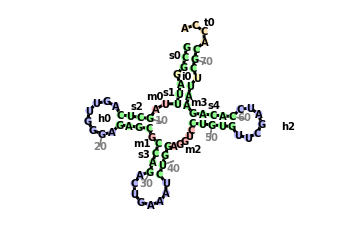

In [8]:
import matplotlib.pyplot as plt
import forgi.visual.mplotlib as fvm
import forgi
cg = forgi.load_rna("1tra.pdb", allow_many=False)
fvm.plot_rna(cg, text_kwargs={"fontweight":"black"}, lighten=0.7,
             backbone_kwargs={"linewidth":3})
plt.show()

In [9]:
forgi.graph.bulge_graph.BulgeGraph(seq)

TypeError: __init__() missing 1 required positional argument: 'seq_obj'

In [ ]:
import py3Dmol as p3d

In [ ]:
v = p3d.view(query='pdb:1tra')


In [13]:
v.setStyle({'background':{'color':'black'}})
v.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol